<a href="https://colab.research.google.com/github/Neeraj-reji/ML-Project-collab/blob/Classification/mobileprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*IMPORTING LIBRARIES*

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### DATA PROCESSING

In [11]:
from google.colab import files
files.upload()

Saving train.csv to train (1).csv


{'train (1).csv': b'battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range\n842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1\n1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2\n563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2\n615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2\n1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1\n1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1\n1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3\n1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0\n1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0\n509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0\n769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0,3\n1520,1,2.2,0,5,1,33,0.5,177,8,18,151,1005,3826,14,9,13,1,1,1,3\n1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1\n80

In [12]:
mobile=pd.read_csv('train.csv')
mobile


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [13]:
mobile.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [14]:
mobile.shape

(2000, 21)

### DATA *ANALYSIS*

In [15]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
mobile.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [17]:
mobile.value_counts('price_range')

price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64

In [18]:
mobile['price_range'].unique()

array([1, 2, 3, 0])

<Axes: xlabel='price_range', ylabel='count'>

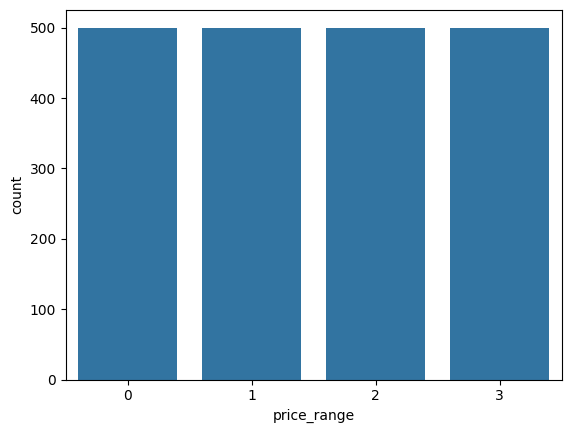

In [19]:
sns.countplot(x='price_range',data=mobile)


<ipython-input-20-04302c49314d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mobile['battery_power'],color='red')


<Axes: xlabel='battery_power', ylabel='Density'>

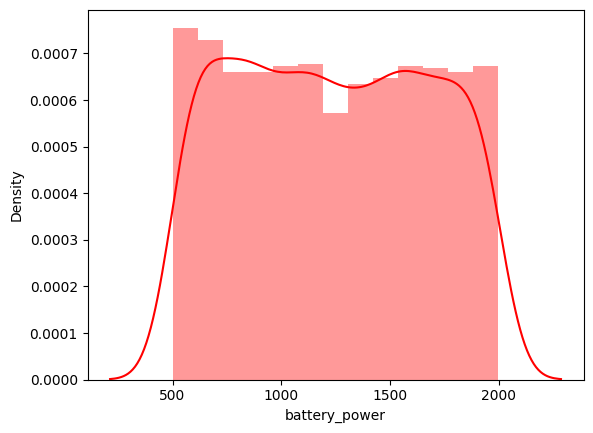

In [20]:
sns.distplot(mobile['battery_power'],color='red')


<Axes: xlabel='price_range', ylabel='ram'>

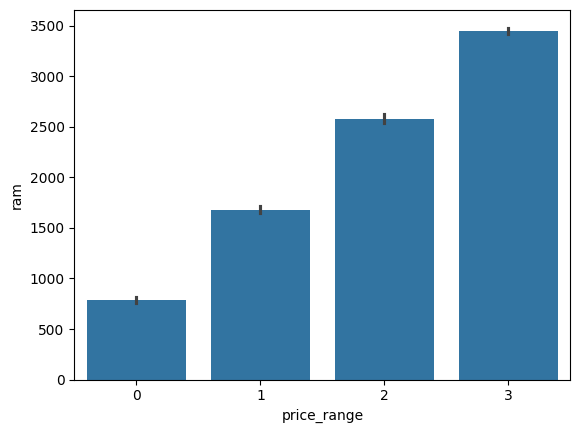

In [21]:
sns.barplot(x='price_range',y='ram',data=mobile)


In [22]:
x=mobile.drop(columns=['price_range','battery_power','clock_speed','dual_sim','four_g','m_dep'], axis=1)
y=mobile['price_range']
print(y)


0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x_train.shape)

(1600, 15)


In [24]:
x_test.to_csv('mobiletest.csv',index=False)
files.download('mobiletest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
print(x_test.shape)


(400, 15)


## **MODEL** **BUILDING**

In [28]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **MODEL** **EVALUATION**

In [29]:
test_data_prediction=classifier.predict(x_test)
accuracy=accuracy_score(test_data_prediction,y_test)
print('accurcy on test data',accuracy)


accurcy on test data 0.68


## **PREDICTION**

In [ ]:
input_data=(635,1,0.5,1,2,0,42,0.4,149,3,4,300,1059,2973,12,5,18,0,0,1)
input_data_array=np.asarray(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)
prediction=classifier.predict(input_data_reshaped)
print(prediction)


In [31]:
y_test

1397    0
1342    1
494     1
349     2
338     2
       ..
112     0
1982    2
363     2
342     2
576     2
Name: price_range, Length: 400, dtype: int64

In [32]:
blue=int(input('enter blue'))
fc=int(input('enter fc'))
intmemory=int(input('enter n=internal memory'))
weight=int(input('enter mobile weight'))
ncores=int(input('enter n_cores'))
pc=int(input('enter pc'))
pxheight=int(input('enter px height'))
pxwidth=int(input('enter width'))
ram=int(input('enter ram'))
sch=int(input('enter sch'))
scw=int(input('enter scw'))
talktime=int(input('enter talktime'))
threeg= int(input('enter 3g'))
touch= int(input('enter touch screen'))
wifi= int(input('enter wifi'))






enter blue0
enter fc1
enter n=internal memory7
enter mobile weight188
enter n_cores2
enter pc6
enter px height20
enter width756
enter ram2549
enter sch9
enter scw7
enter talktime19
enter 3g0
enter touch screen0
enter wifi1


In [35]:
user_data=[blue,fc,intmemory,weight,ncores,pc,pxheight,pxwidth,ram,sch,scw,talktime,threeg,touch,wifi]
user_data=np.array(user_data).reshape(1,15)
prediction=classifier.predict(user_data)
print(prediction)


[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
